### 🚩 Quick checklist for visualization notebook:
✅ Load the saved train/test data from modeling notebook<br>
✅ Or rerun train_test_split with same random_state for reproducibility<br>
✅ Load trained model if saved (joblib.load() or .pickle)<br>
✅ Or retrain quickly with saved parameters (like n_estimators=50, random_state=42)

In [1]:
# 📦 Import packages
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# 🖼️ Set plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# ✅ Optional: Inline plots
%matplotlib inline


In [2]:
rf_loaded, feature_names = joblib.load('../data/trained/random_forest_model_with_features.pkl')

X_test = pd.read_csv('../data/test/X_test.csv')
y_test = pd.read_csv('../data/test/y_test.csv')


In [3]:
y_pred = rf_loaded.predict(X_test)


# 📄 Documentation: Model Saving and Test Data Export

## 🎯 Objective:

Save the trained Random Forest model and its associated test dataset to disk, enabling reuse across notebooks and environments without retraining or re-splitting data.

---

## ✅ Why save the model and test data?

- Ensure **consistent evaluation** across visualization, reporting, and deployment notebooks
- Prevent accidental differences in train-test splits across notebooks
- Enable future reuse of the trained model **without recomputing or retraining**
- Package the model and its test dataset together as a **reproducible artifact**

---

## 🏗️ Directory Structure:

We chose to save both the trained model and test dataset inside the `data/trained/` directory to logically group them as outputs of the training process:




This approach:

✅ Keeps all training artifacts together<br>
✅ Clarifies which test set was used to evaluate the saved model<br>
✅ Avoids mixing these outputs with `data/processed/`, which contains general cleaned inputs<br>

---

## 📝 Saving the trained model:

In the modeling notebook:

```python
import joblib

# Save trained model
joblib.dump(rf, 'data/trained/random_forest_model.pkl')


Rather than retrain the model or recompute train-test splits across multiple notebooks, I saved both the trained Random Forest model and the associated test dataset into a data/trained/ folder. This approach ensures the evaluation dataset stays consistent, allows seamless reuse of the trained model, and keeps the project organized as a reproducible workflow. It’s a simple yet powerful step toward production-ready machine learning engineering.

## Visualization

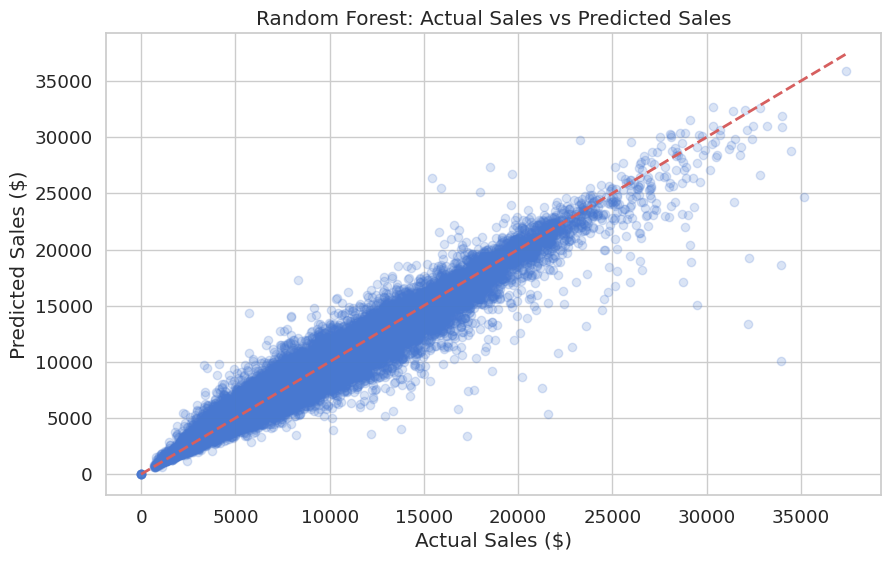

In [4]:
# plot actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.title('Random Forest: Actual Sales vs Predicted Sales')

# ✅ Save the figure
plt.savefig('../plots/actual_vs_predicted.png', dpi=300, bbox_inches='tight')

plt.show()


# 📊 Why Linear Regression Fails: Visualizing Model Fit

## 🎯 Interpreting the Actual vs Predicted Plot

The plot below shows:

✅ X-axis: Actual target values
✅ Y-axis: Predicted values from the Random Forest model
✅ Red dashed line: Perfect predictions (ideal 1:1 line)
✅ Blue dots: Model’s predictions vs actual

![Actual vs Predicted Plot](path/to/plot.png)

Key observations:

- Predictions hug the ideal line closely at low values
- Spread increases as actual values get larger (especially > 20,000)
- The shape forms a **funnel** → narrow at low values, wider at high values

---

## ❌ Why Linear Regression Struggles

### 🚩 1️⃣ **Non-linear or heteroscedastic relationship**

Linear regression assumes:

> “A straight line can best minimize error across all values.”

But in this data:

- Low values → tight variance
- High values → increasing spread
- Relationship bends or curves, not a perfect straight line

👉 A single slope can’t capture that bending pattern → **linear regression leaves large unexplained variance → low R².**

---

### 🚩 2️⃣ **Interaction or threshold effects**

Random Forest is implicitly learning splits like:

> “If X1 > 5000 AND X2 < 0.3 → predict higher value.”

Linear regression can only do:

> “Outcome = constant + slope1\*X1 + slope2\*X2…”

✅ Random Forest adapts to localized patterns.
❌ Linear regression fits one global trend line.

---

### 🚩 3️⃣ **Increasing error variance (heteroscedasticity)**

Linear regression assumes **constant variance of errors** across the range.

But this plot shows:

- Small error spread at low actual values
- Wider error spread at high actual values

✅ This violates a key assumption of linear regression → leading to inefficient and biased estimates.

Random Forest handles this automatically → it partitions regions with different variances.

---

## ✨ Analogy:

- **Linear regression** → like fitting with a ruler
- **Random forest** → like cutting and taping shapes to follow curves

The data needs bends, cutouts, patches → a ruler can’t contour to it.

✅ Random Forest’s flexibility explains why it achieves **R² = 0.95+**, while linear regression stalls at **R² = 0.14**.

---

## 🏆 Visually:

If we overlayed linear regression’s predictions → we’d see:

❌ A straight trend line missing the subtle upward bending pattern
✅ Random Forest predictions closely following the ideal line (with some natural spread)

---

## 🔬 Improvements:

Linear regression’s performance increased from:

| Model                         | R²   |
|------------------------------|-------|
| Linear Regression             | 0.14  |
| Polynomial Regression         | 0.85  |
| Random Forest (50 trees)      | 0.95  |

✅ Adding polynomial features boosted linear regression → but still couldn’t match the tree-based model.

---

## 📝 Plain English Summary:

The relationship between features and target is:

> “Not just a straight line → it bends, interacts, and widens at higher values.”

Linear regression:

> ❌ “Can only fit one straight line through everything.”

Random Forest:

> ✅ “Can chop space into flexible zones and adapt to complexity.”

This plot proves why Random Forest outperforms linear regression for this dataset.



In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168697 entries, 0 to 168696
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DayOfWeek      168697 non-null  int64  
 1   Customers      168697 non-null  int64  
 2   Open           168697 non-null  int64  
 3   Promo          168697 non-null  int64  
 4   StateHoliday   168697 non-null  int64  
 5   SchoolHoliday  168697 non-null  int64  
 6   Month          168697 non-null  int64  
 7   Year           168697 non-null  int64  
 8   WeekOfYear     168697 non-null  int64  
 9   StoreEncoded   168697 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 12.9 MB


In [6]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168697 entries, 0 to 168696
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Sales   168697 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
